# Prevendo Chances de Admissão na Universidade Internacional

**Sobre o Projeto:**

Este projeto será útil para alunos que planejam obter a admissão em uma Universidade Internacional.

O objetivo do projeto é prever as chances de conseguir uma vaga em uma Universidade Internacional.

Primeiro, começaremos com a **análise exploratória dos dados**. Por último, **criaremos um modelo** para prever as chances de um aluno ser admitido. 

**Sobre o Problema:**

O problema de admissão de alunos é muito importante nas instituições de ensino.

A ideia é ajudar os alunos a saber com antecedência se eles têm a chance de serem aceitos.

A maioria dos alunos fica em pânico esperando uma resposta das universidades para as quais se inscreveram.

Eles podem receber perguntas como:
- Eles serão admitidos na universidade aplicada?
- E se eles rejeitarem minha inscrição com apenas uma pontuação de 0,1?

Todas essas perguntas poderão ser respondidas.

**Sobre os dados:**

O conjunto de dados de **Predição de Admissão** tem 500 amostras, cada uma 
com nove atributos numéricos:

1. Serial No.
2. GRE [Graduate Record Examinations] Scores ( até 340 ).
3. TOEFL [Test of English as a Foreign Language] Scores ( até 120 ).
4. University Rating ( até 5 ).
5. SOP [Statement of Purpose] ( até 5 ).
6. LOR [Letter of Recommendation Strength] ( até 5 ).
7. CGPA [Cumulative Grade Points Average] ( até 10 ).
8. Research ( 0 ou 1 ).
9. Chance of Admit ( de 0 até 1 ).

Faremos uma regressão linear múltipla que usa oito dos nove atributos numéricos para fazer previsões das chances de admissão em uma Universidade Internacional.

## 1. Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## 2. Carregando os dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vichShir/tt050-sad/master/trabalho/data/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 3. Explorando os dados com DataFrame

In [ ]:
df.shape

(500, 9)

In [ ]:
df.ndim

2

In [ ]:
df.size

4500

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

## 4. Estatística básica

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


## 5. Verificando as colunas categóricas e numéricas

In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Colunas categóricas:", cat_features)

Colunas categóricas: []


In [ ]:
discrete_features = [feature for feature in df.columns if df[feature].dtypes == 'Int64']
print("Colunas númericas discretas:", discrete_features)

Colunas númericas discretas: ['GRE Score', 'TOEFL Score', 'University Rating', 'Research']


In [ ]:
continous_features = [feature for feature in df.columns if df[feature].dtypes == 'Float64']
print("Colunas númericas contínuas:", continous_features)

Colunas númericas contínuas: ['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


In [ ]:
rename_columns = {
    'GRE Score': 'GRE',
    'TOEFL Score': 'TOEFL',
    'University Rating': 'UniversityRating',
    'LOR ': 'LOR',
    'Chance of Admit ': 'ChanceAdmit'
}

df.rename(rename_columns, axis=1, inplace=True)

In [ ]:
df.columns

Index(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'ChanceAdmit'],
      dtype='object')

## 6. Valores Únicos

In [ ]:
df_uniques = {
    x: pd.DataFrame(df[x].value_counts()) for x in ['GRE', 'TOEFL', 'UniversityRating', 'Research']
}
display(df_uniques['GRE'])
display(df_uniques['TOEFL'])
display(df_uniques['UniversityRating'])
display(df_uniques['Research'])

,GRE
312,24
324,23
316,18
321,17
322,17
327,17
314,16
311,16
320,16
317,15


,TOEFL
110,44
105,37
104,29
112,28
107,28
106,28
103,25
102,24
100,24
99,23


,UniversityRating
3,162
2,126
4,105
5,73
1,34


,Research
1,280
0,220


## 7. Descobrindo os valores nulos

In [ ]:
null_values = df.isnull().sum()
null_values

GRE                 0
TOEFL               0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceAdmit         0
dtype: int64

In [ ]:
notnull_values = df.notnull().sum()
notnull_values

GRE                 500
TOEFL               500
UniversityRating    500
SOP                 500
LOR                 500
CGPA                500
Research            500
ChanceAdmit         500
dtype: int64

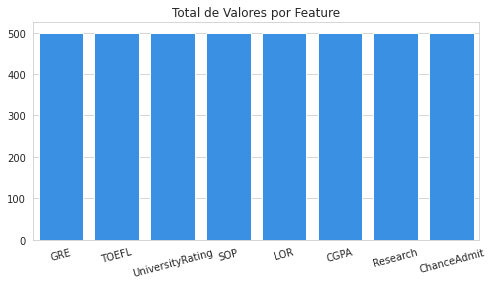

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=notnull_values.index, y=notnull_values.values, color='dodgerblue')
plt.title('Total de Valores por Feature')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# Porcentagem de valores nulos
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Porcentagem'])
missing_data(df)

,Total,Porcentagem
ChanceAdmit,0,0.0
Research,0,0.0
CGPA,0,0.0
LOR,0,0.0
SOP,0,0.0
UniversityRating,0,0.0
TOEFL,0,0.0
GRE,0,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceAdmit


## 8. Análise Univariada

**Insights:** Ao analisar a distribuição do **GREScore**, podemos dizer que o maior número de estudantes do GREscore está entre **312 e 324**.

E a grande parte dos estudantes do GREScore concentram-se entre **304 e 330**. 

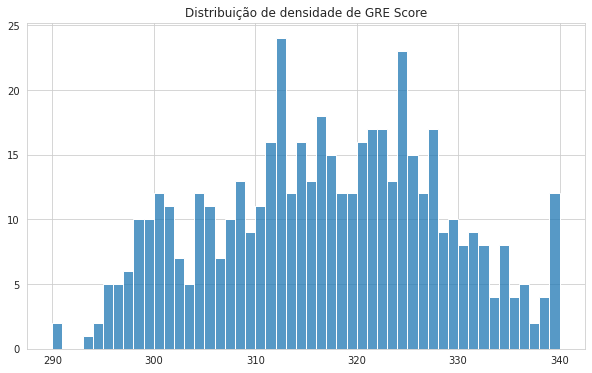

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="GRE", bins=50)
plt.title('Distribuição de densidade de GRE Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição do **TOEFLScore**, podemos dizer que o maior número de estudantes do TOEFLScore está entre **110 e 105**.

E a grande parte dos estudantes do TOEFLScore concentram-se entre **99 e 115**. 

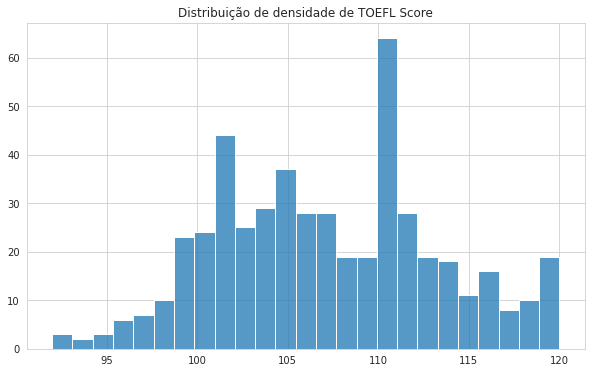

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="TOEFL", bins=25)
plt.title('Distribuição de densidade de TOEFL Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição do **UniversityRating**, podemos dizer que o maior número do UniversityRating está entre **2 e 3**. 

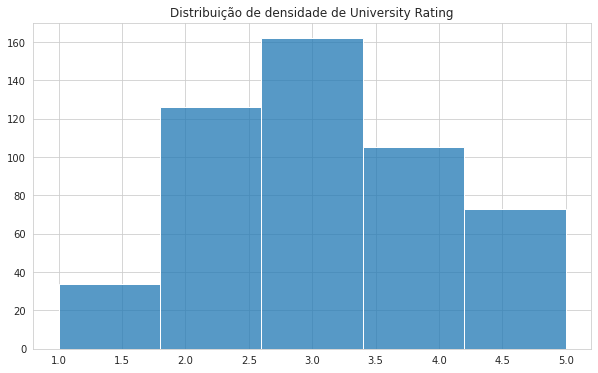

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="UniversityRating", bins=5)
plt.title('Distribuição de densidade de University Rating')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição do **SOP**, podemos dizer que o maior número do Statement of Purpose está entre **2,5 e 4,5**.

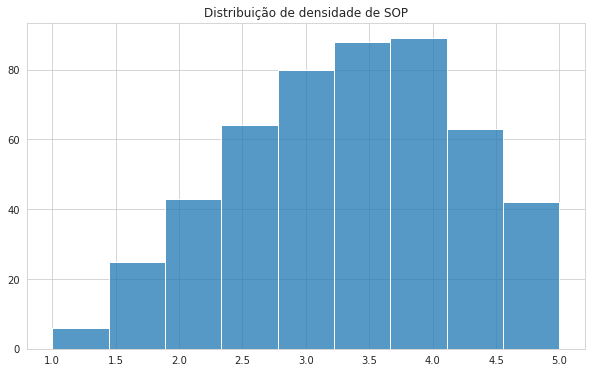

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="SOP", bins=9)
plt.title('Distribuição de densidade de SOP')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição do **LOR**, podemos dizer que o maior número do Letter of Recommendation Strength está entre **2,5 e 4,5**.

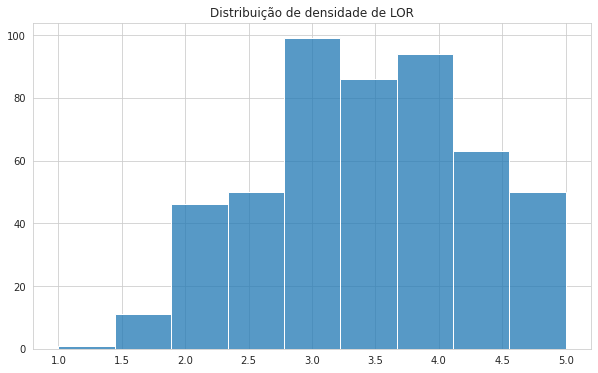

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="LOR", bins=9)
plt.title('Distribuição de densidade de LOR')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição de **Research**, podemos dizer que o maior número de estudantes com Pesquisa é **1**.

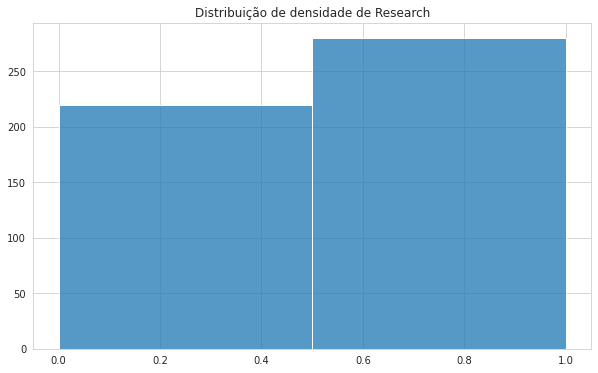

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Research", bins=2)
plt.title('Distribuição de densidade de Research')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights:** Ao analisar a distribuição de **ChanceOfAdmit**, podemos dizer que a maior porcentagem de obtenção de admissão na universidade está entre **0,6 e 1,0**.

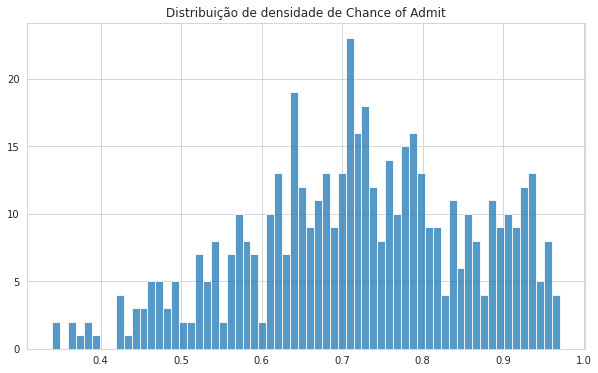

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="ChanceAdmit", bins=64)
plt.title('Distribuição de densidade de Chance of Admit')
plt.xlabel('')
plt.ylabel('')
plt.show()

## 9. Análise Bivariada

**Insights:** Há uma forte relação positiva entre **GREScore e ChanceOfAdmit**.

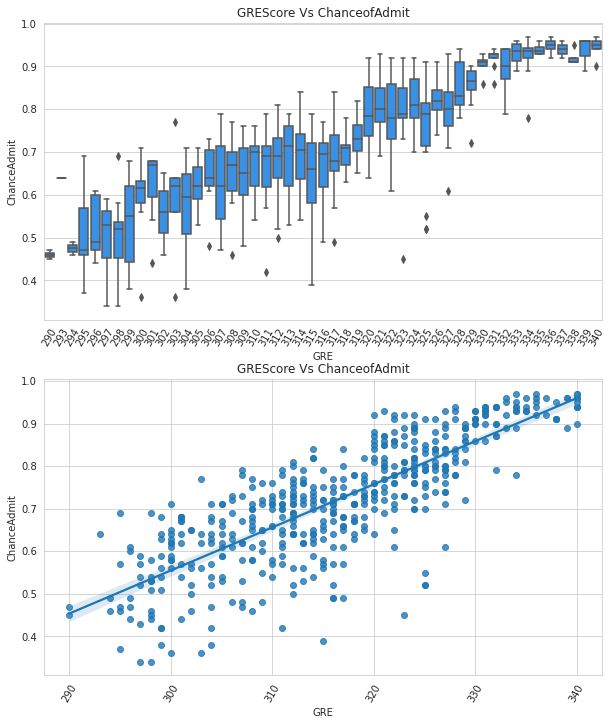

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="GRE", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=60)
ax.set_title('GREScore Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="GRE", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=60)
ax.set_title('GREScore Vs ChanceofAdmit')
plt.show()

**Insights:** há uma forte relação positiva entre **TOEFLScore e ChanceOfAdmit**.

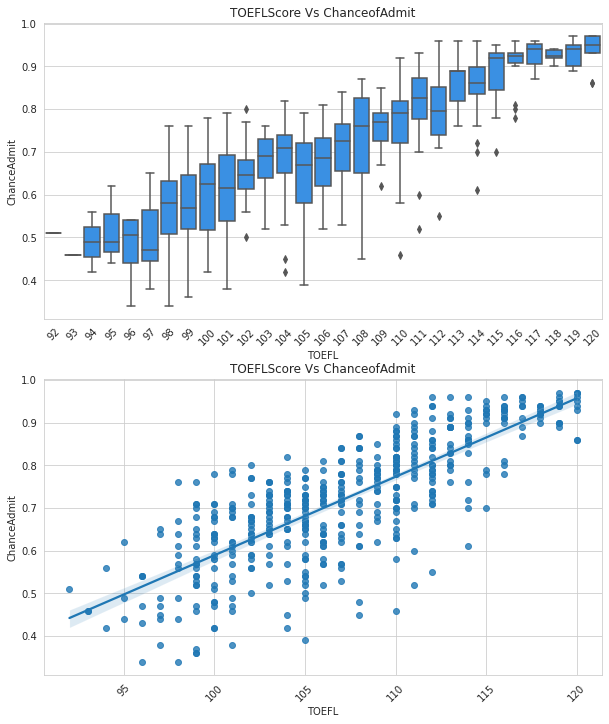

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="TOEFL", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('TOEFLScore Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="TOEFL", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=45)
ax.set_title('TOEFLScore Vs ChanceofAdmit')
plt.show()

**Insights:** Não conseguimos ver nenhuma relação entre a **UniversityRating e ChanceofAdmit**.

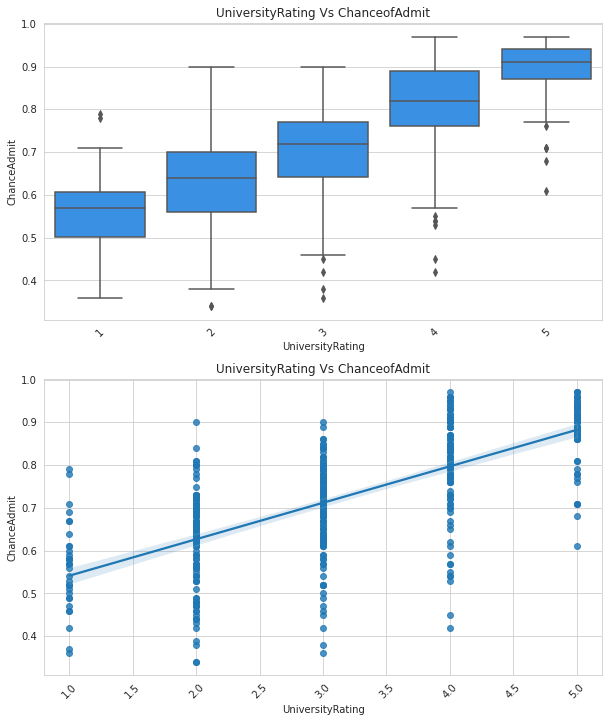

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="UniversityRating", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('UniversityRating Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="UniversityRating", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=45)
ax.set_title('UniversityRating Vs ChanceofAdmit')
plt.show()

**Insights:** Não conseguimos ver nenhuma relação entre o **SOP e ChanceofAdmit**.

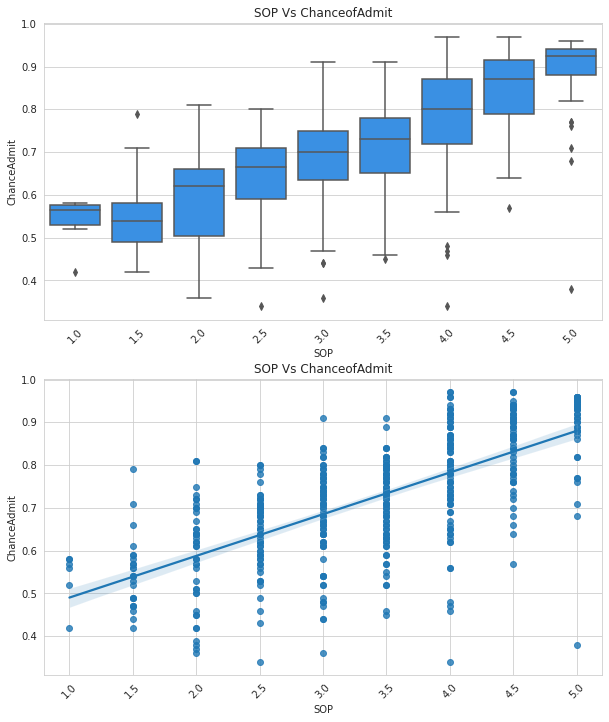

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="SOP", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('SOP Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="SOP", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=45)
ax.set_title('SOP Vs ChanceofAdmit')
plt.show()

**Insights:** Não conseguimos ver nenhuma relação entre o **LOR e ChanceOfAdmit**.

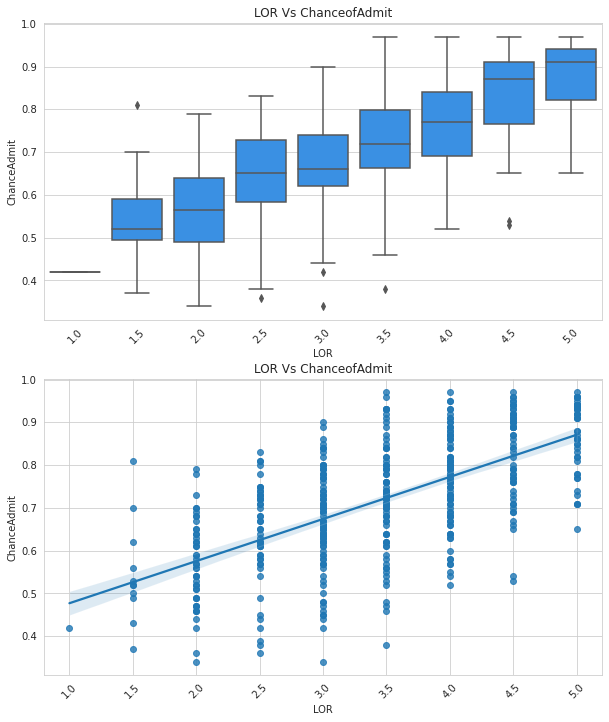

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="LOR", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('LOR Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="LOR", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=45)
ax.set_title('LOR Vs ChanceofAdmit')
plt.show()

**Insights:** Fica evidenciado que **CGPA e ChanceOfAdmit** tem uma relação positiva forte.

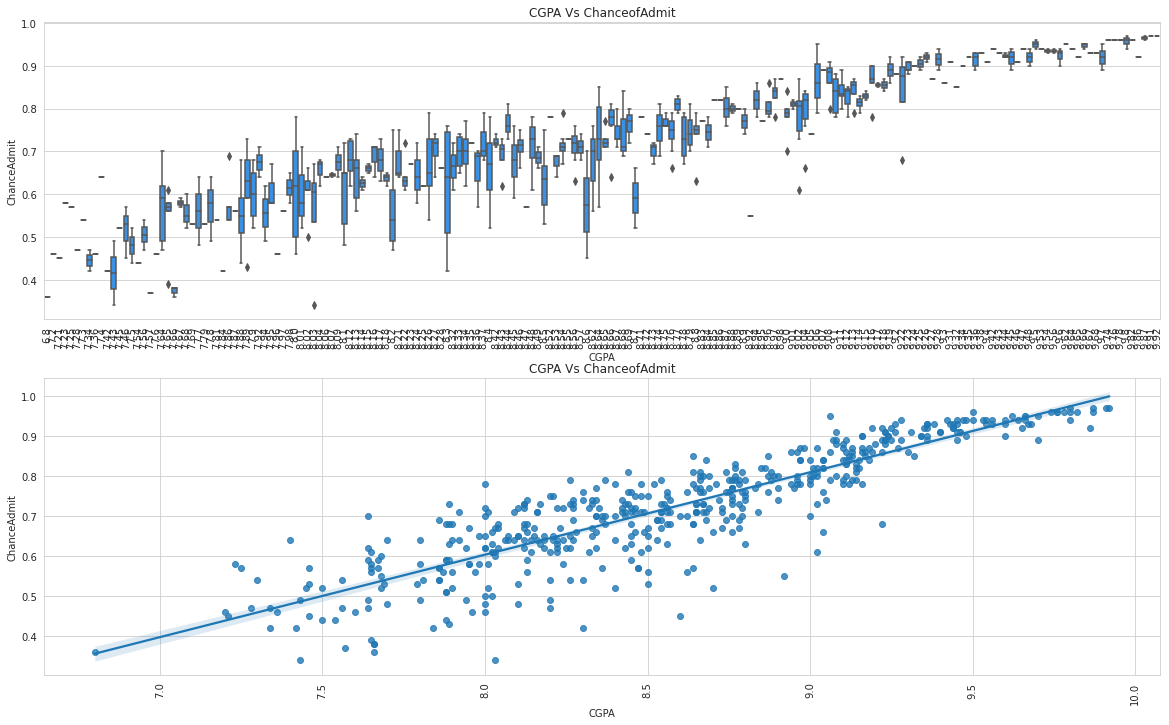

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

ax = sns.boxplot(ax=axes[0], x="CGPA", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('CGPA Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="CGPA", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=90)
ax.set_title('CGPA Vs ChanceofAdmit')
plt.show()

**Insights:** Não conseguimos ver nenhuma relação entre **Research e ChanceofAdmit**.

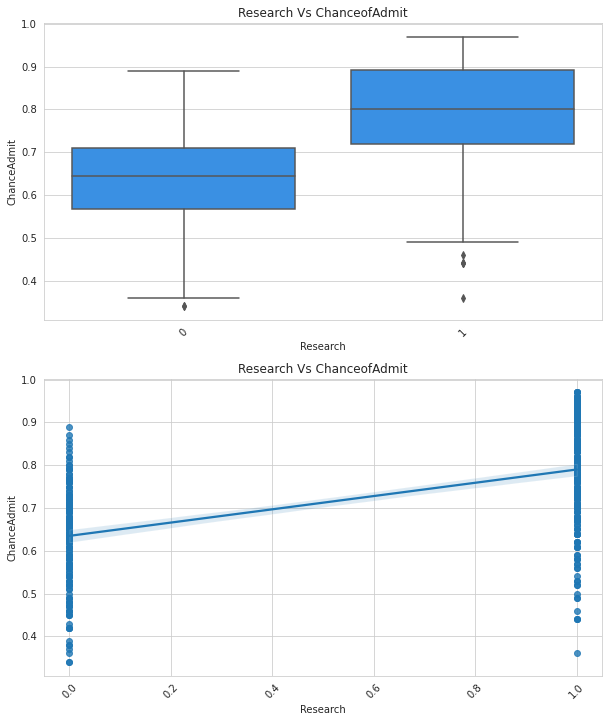

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax = sns.boxplot(ax=axes[0], x="Research", y="ChanceAdmit", data=df, color='dodgerblue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Research Vs ChanceofAdmit')

ax = sns.regplot(ax=axes[1], x="Research", y="ChanceAdmit", data=df)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Research Vs ChanceofAdmit')
plt.show()

## 10. Verificando a Multicolinearidade 

**P1 - Existe alguma relação entre o GREScore e os outros recursos?**

Parece que **"CGPA" e "TOEFLScore"** são correlacionados positivamente com GREScore.

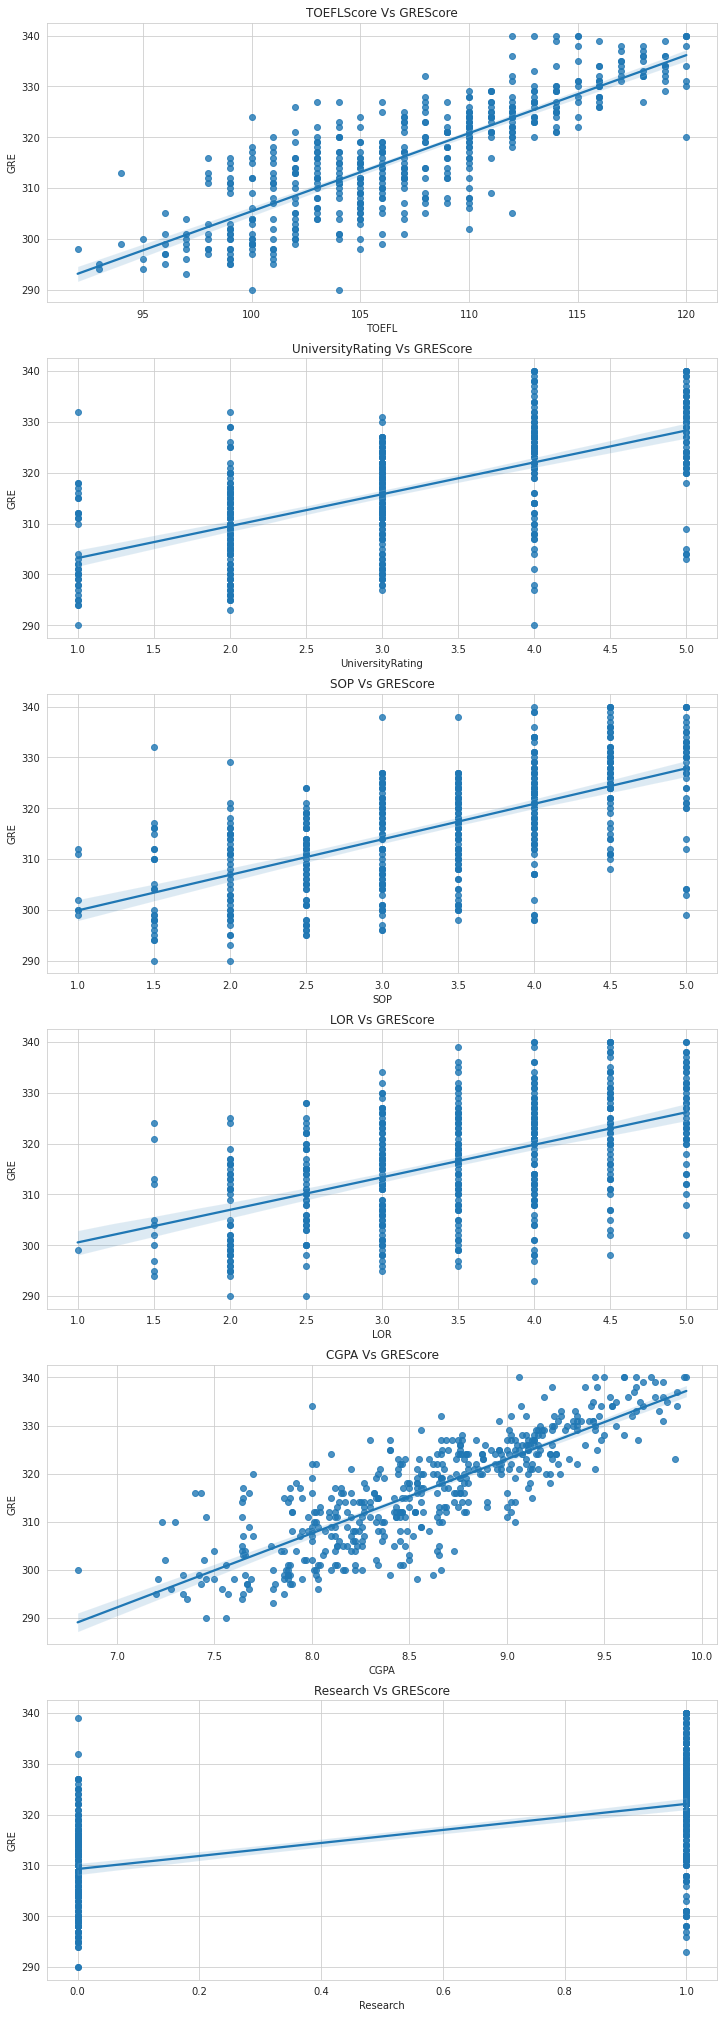

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# TOEFLScore Vs GREScore
ax = sns.regplot(ax=axes[0], x="TOEFL", y="GRE", data=df)
ax.set_title('TOEFLScore Vs GREScore')

# UniversityRating Vs GREScore
ax = sns.regplot(ax=axes[1], x="UniversityRating", y="GRE", data=df)
ax.set_title('UniversityRating Vs GREScore')

# SOP Vs GREScore
ax = sns.regplot(ax=axes[2], x="SOP", y="GRE", data=df)
ax.set_title('SOP Vs GREScore')

# LOR Vs GREScore
ax = sns.regplot(ax=axes[3], x="LOR", y="GRE", data=df)
ax.set_title('LOR Vs GREScore')

# CGPA Vs GREScore
ax = sns.regplot(ax=axes[4], x="CGPA", y="GRE", data=df)
ax.set_title('CGPA Vs GREScore')

# Research Vs GREScore
ax = sns.regplot(ax=axes[5], x="Research", y="GRE", data=df)
ax.set_title('Research Vs GREScore')
plt.show()

**P2- Existe alguma relação entre o TOEFLScore e os outros recursos?**

Parece que **"CGPA" e "GREScore"** são correlacionados positivamente com TOEFLScore.

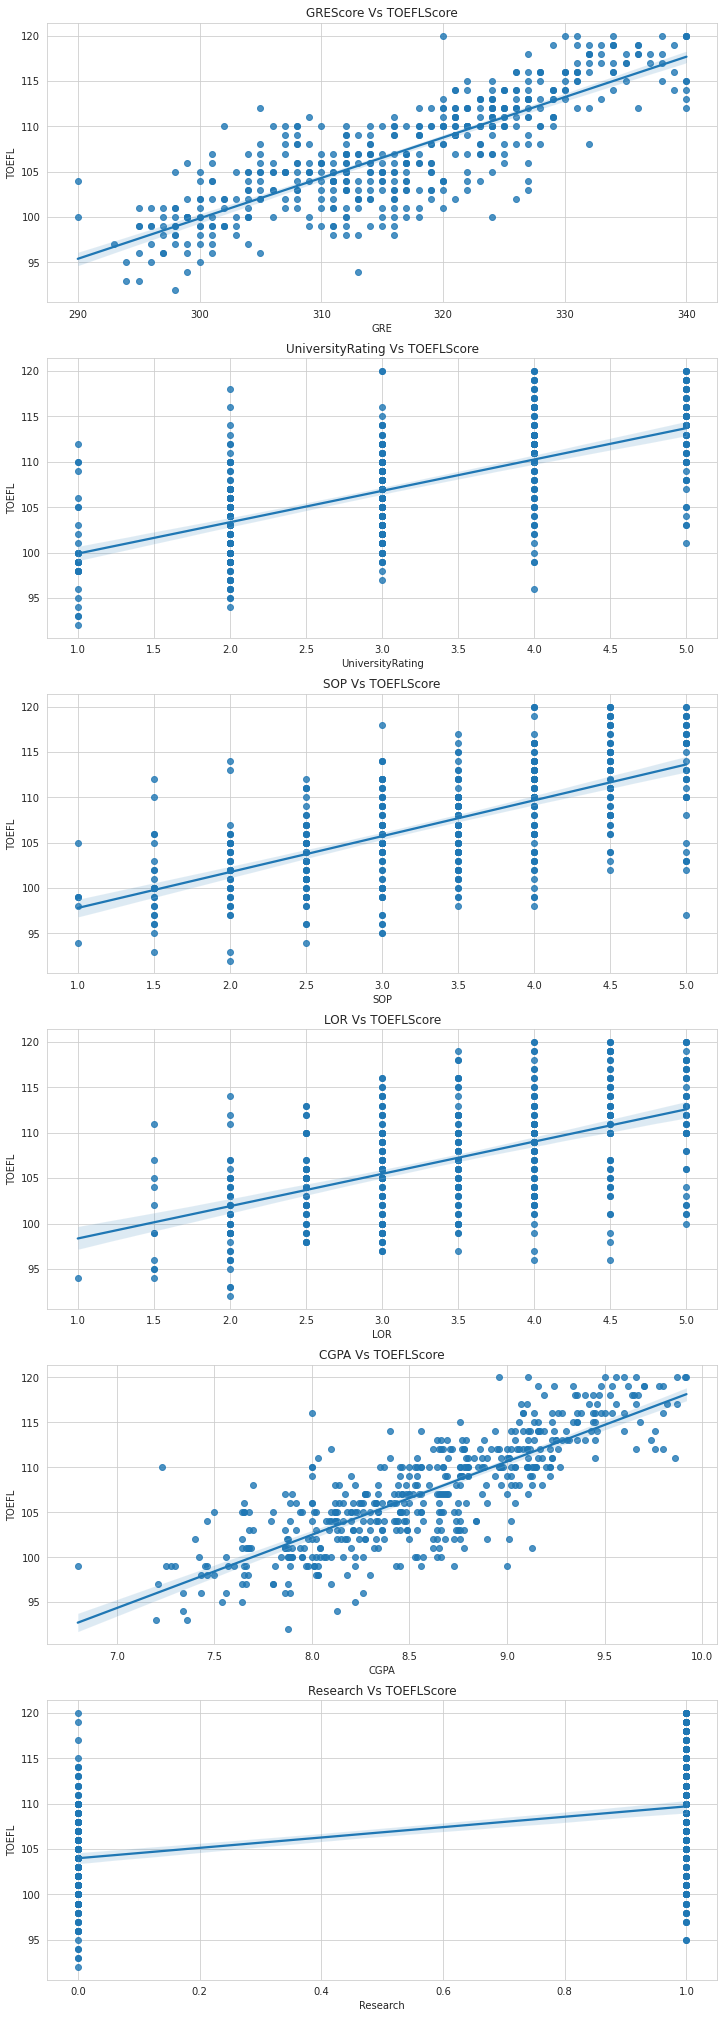

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs TOEFLScore
ax = sns.regplot(ax=axes[0], x="GRE", y="TOEFL", data=df)
ax.set_title('GREScore Vs TOEFLScore')

# UniversityRating Vs TOEFLScore
ax = sns.regplot(ax=axes[1], x="UniversityRating", y="TOEFL", data=df)
ax.set_title('UniversityRating Vs TOEFLScore')

# SOP Vs TOEFLScore
ax = sns.regplot(ax=axes[2], x="SOP", y="TOEFL", data=df)
ax.set_title('SOP Vs TOEFLScore')

# LOR Vs TOEFLScore
ax = sns.regplot(ax=axes[3], x="LOR", y="TOEFL", data=df)
ax.set_title('LOR Vs TOEFLScore')

# CGPA Vs TOEFLScore
ax = sns.regplot(ax=axes[4], x="CGPA", y="TOEFL", data=df)
ax.set_title('CGPA Vs TOEFLScore')

# Research Vs TOEFLScore
ax = sns.regplot(ax=axes[5], x="Research", y="TOEFL", data=df)
ax.set_title('Research Vs TOEFLScore')
plt.show()

**P3 - Existe alguma relação entre UniversityRating e os outros recursos?**

Não conseguimos ver qualquer correlação entre os recursos.

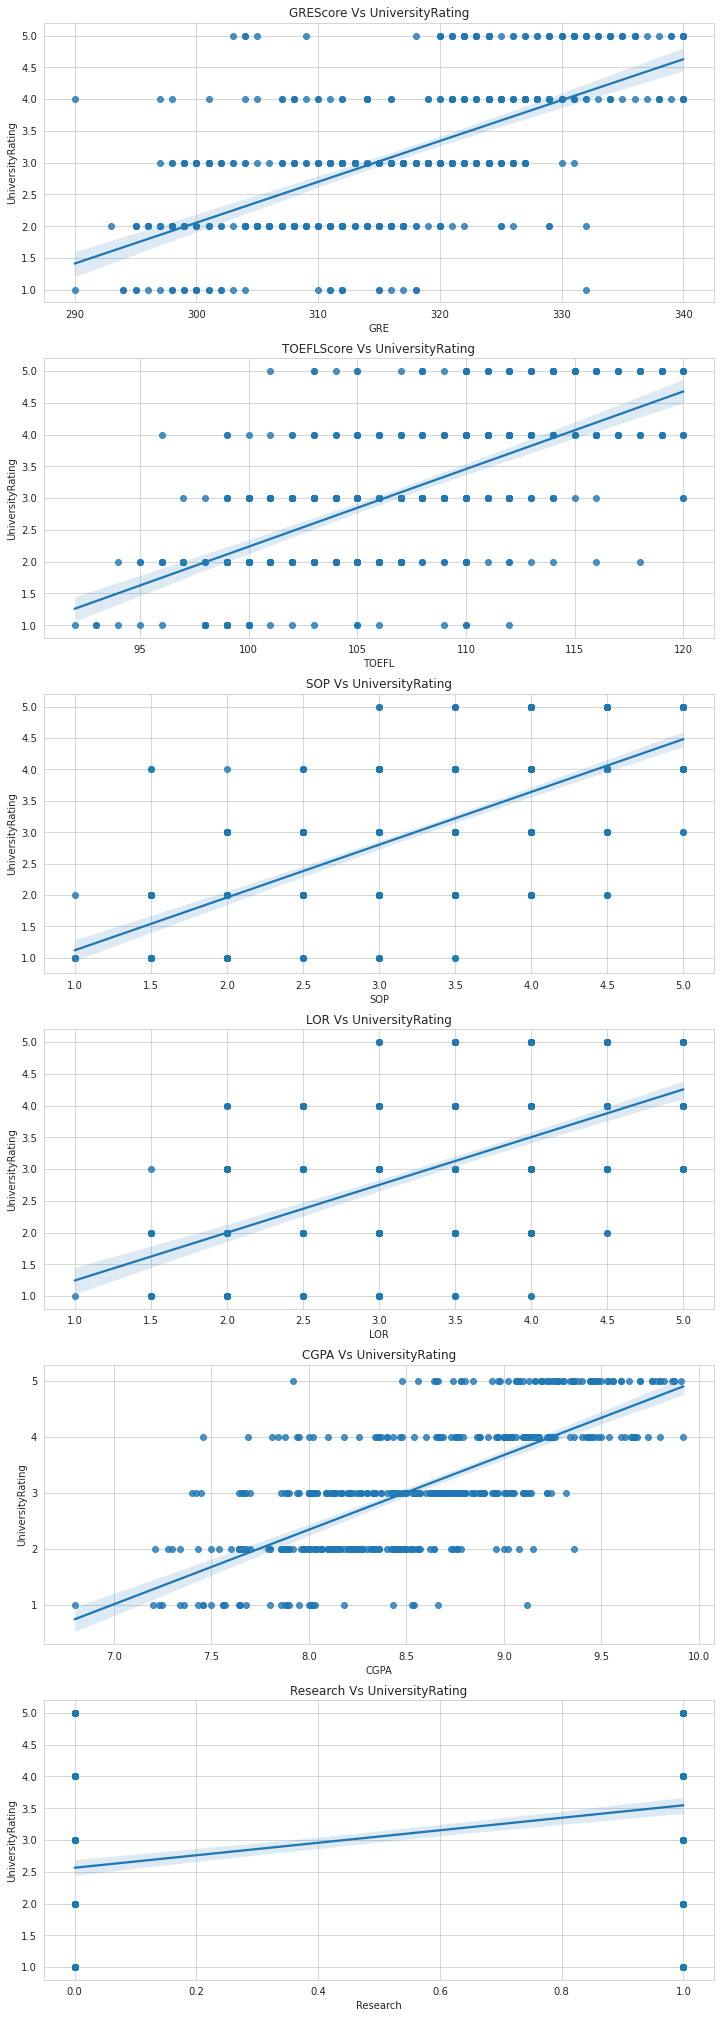

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs UniversityRating
ax = sns.regplot(ax=axes[0], x="GRE", y="UniversityRating", data=df)
ax.set_title('GREScore Vs UniversityRating')

# TOEFLScore Vs UniversityRating
ax = sns.regplot(ax=axes[1], x="TOEFL", y="UniversityRating", data=df)
ax.set_title('TOEFLScore Vs UniversityRating')

# SOP Vs UniversityRating
ax = sns.regplot(ax=axes[2], x="SOP", y="UniversityRating", data=df)
ax.set_title('SOP Vs UniversityRating')

# LOR Vs UniversityRating
ax = sns.regplot(ax=axes[3], x="LOR", y="UniversityRating", data=df)
ax.set_title('LOR Vs UniversityRating')

# CGPA Vs UniversityRating
ax = sns.regplot(ax=axes[4], x="CGPA", y="UniversityRating", data=df)
ax.set_title('CGPA Vs UniversityRating')

# Research Vs UniversityRating
ax = sns.regplot(ax=axes[5], x="Research", y="UniversityRating", data=df)
ax.set_title('Research Vs UniversityRating')
plt.show()

**P4 - Existe uma relação entre o SOP e os outros recursos?**

Parece que **"CGPA", "GREScore" e "TOEFLScore"** são correlacionados positivamente com SOP.

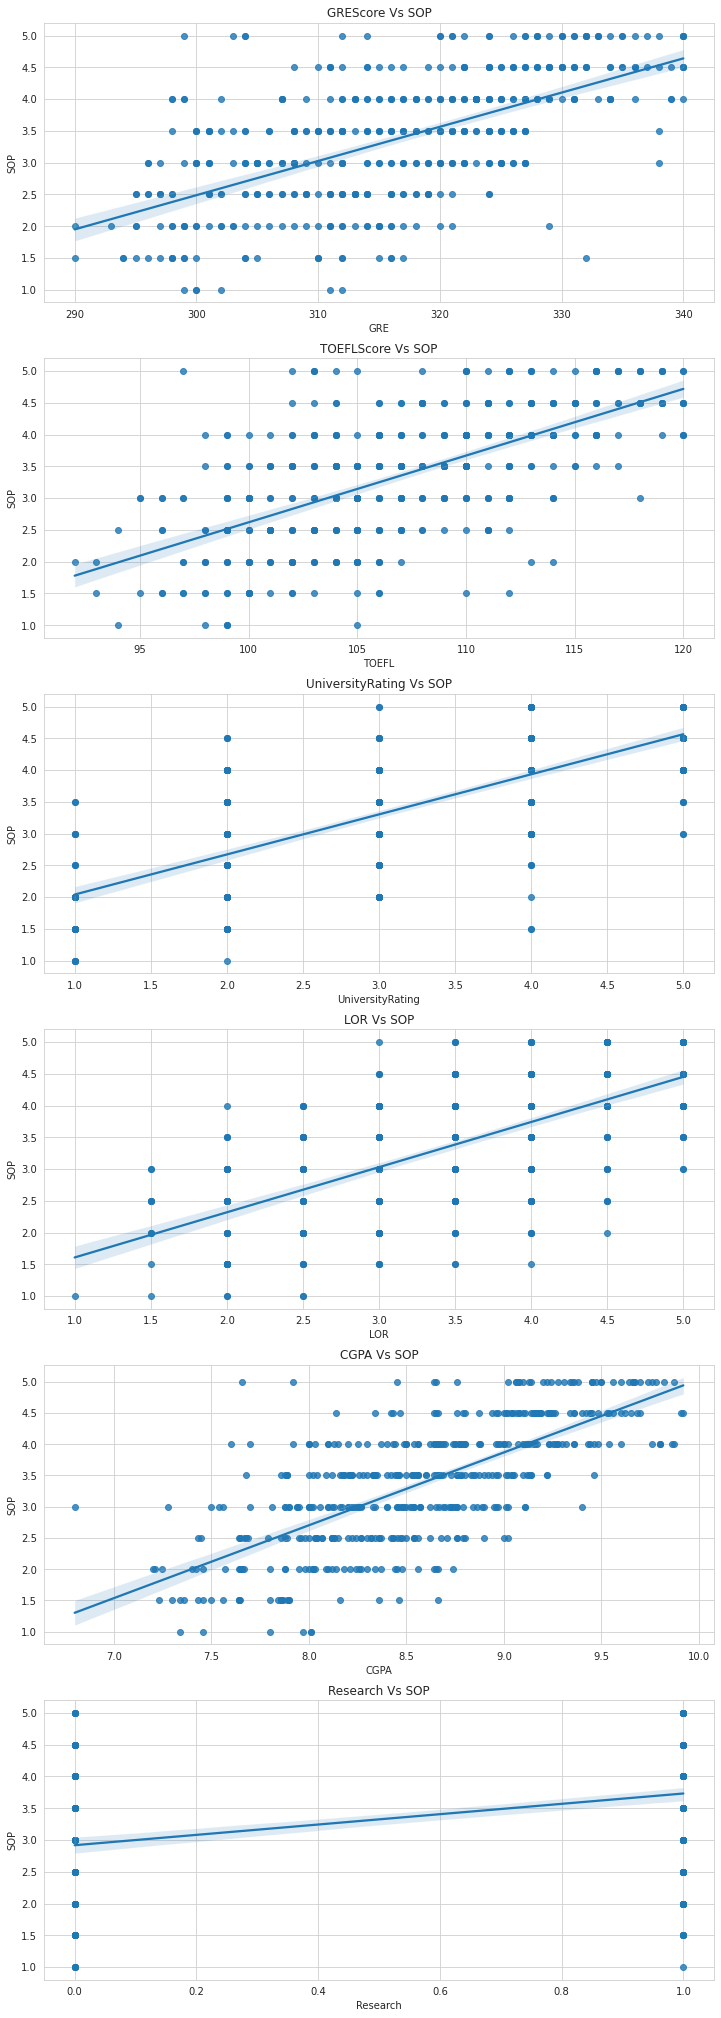

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs SOP
ax = sns.regplot(ax=axes[0], x="GRE", y="SOP", data=df)
ax.set_title('GREScore Vs SOP')

# TOEFLScore Vs SOP
ax = sns.regplot(ax=axes[1], x="TOEFL", y="SOP", data=df)
ax.set_title('TOEFLScore Vs SOP')

# UniversityRating Vs SOP
ax = sns.regplot(ax=axes[2], x="UniversityRating", y="SOP", data=df)
ax.set_title('UniversityRating Vs SOP')

# LOR Vs SOP
ax = sns.regplot(ax=axes[3], x="LOR", y="SOP", data=df)
ax.set_title('LOR Vs SOP')

# CGPA Vs SOP
ax = sns.regplot(ax=axes[4], x="CGPA", y="SOP", data=df)
ax.set_title('CGPA Vs SOP')

# Research Vs SOP
ax = sns.regplot(ax=axes[5], x="Research", y="SOP", data=df)
ax.set_title('Research Vs SOP')
plt.show()

**P5 - Existe uma relação entre o LOR e os outros recursos?**

Parece que **"CGPA", "GREScore" e "TOEFLScore"** são correlacionados positivamente com LOR.

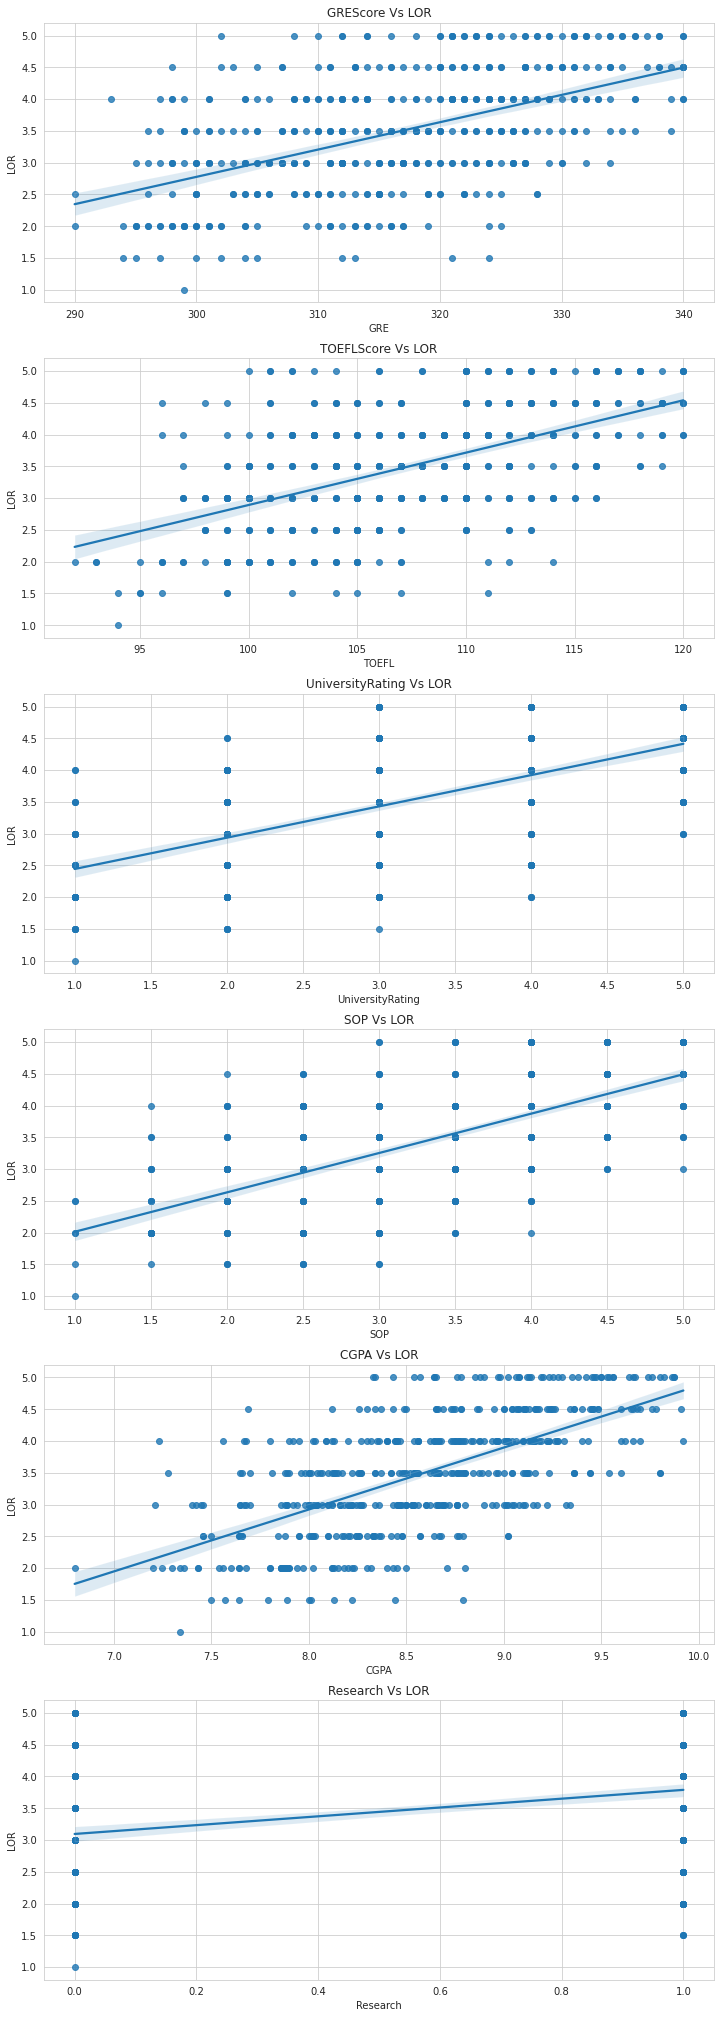

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs LOR
ax = sns.regplot(ax=axes[0], x="GRE", y="LOR", data=df)
ax.set_title('GREScore Vs LOR')

# TOEFLScore Vs LOR
ax = sns.regplot(ax=axes[1], x="TOEFL", y="LOR", data=df)
ax.set_title('TOEFLScore Vs LOR')

# UniversityRating Vs LOR
ax = sns.regplot(ax=axes[2], x="UniversityRating", y="LOR", data=df)
ax.set_title('UniversityRating Vs LOR')

# SOP Vs LOR
ax = sns.regplot(ax=axes[3], x="SOP", y="LOR", data=df)
ax.set_title('SOP Vs LOR')

# CGPA Vs LOR
ax = sns.regplot(ax=axes[4], x="CGPA", y="LOR", data=df)
ax.set_title('CGPA Vs LOR')

# Research Vs LOR
ax = sns.regplot(ax=axes[5], x="Research", y="LOR", data=df)
ax.set_title('Research Vs LOR')
plt.show()

**P6 - Existe uma relação entre o CGPA e os outros recursos?**

Parece que **"GREScore" e "TOEFLScore"** são correlacionados positivamente com CGPA.

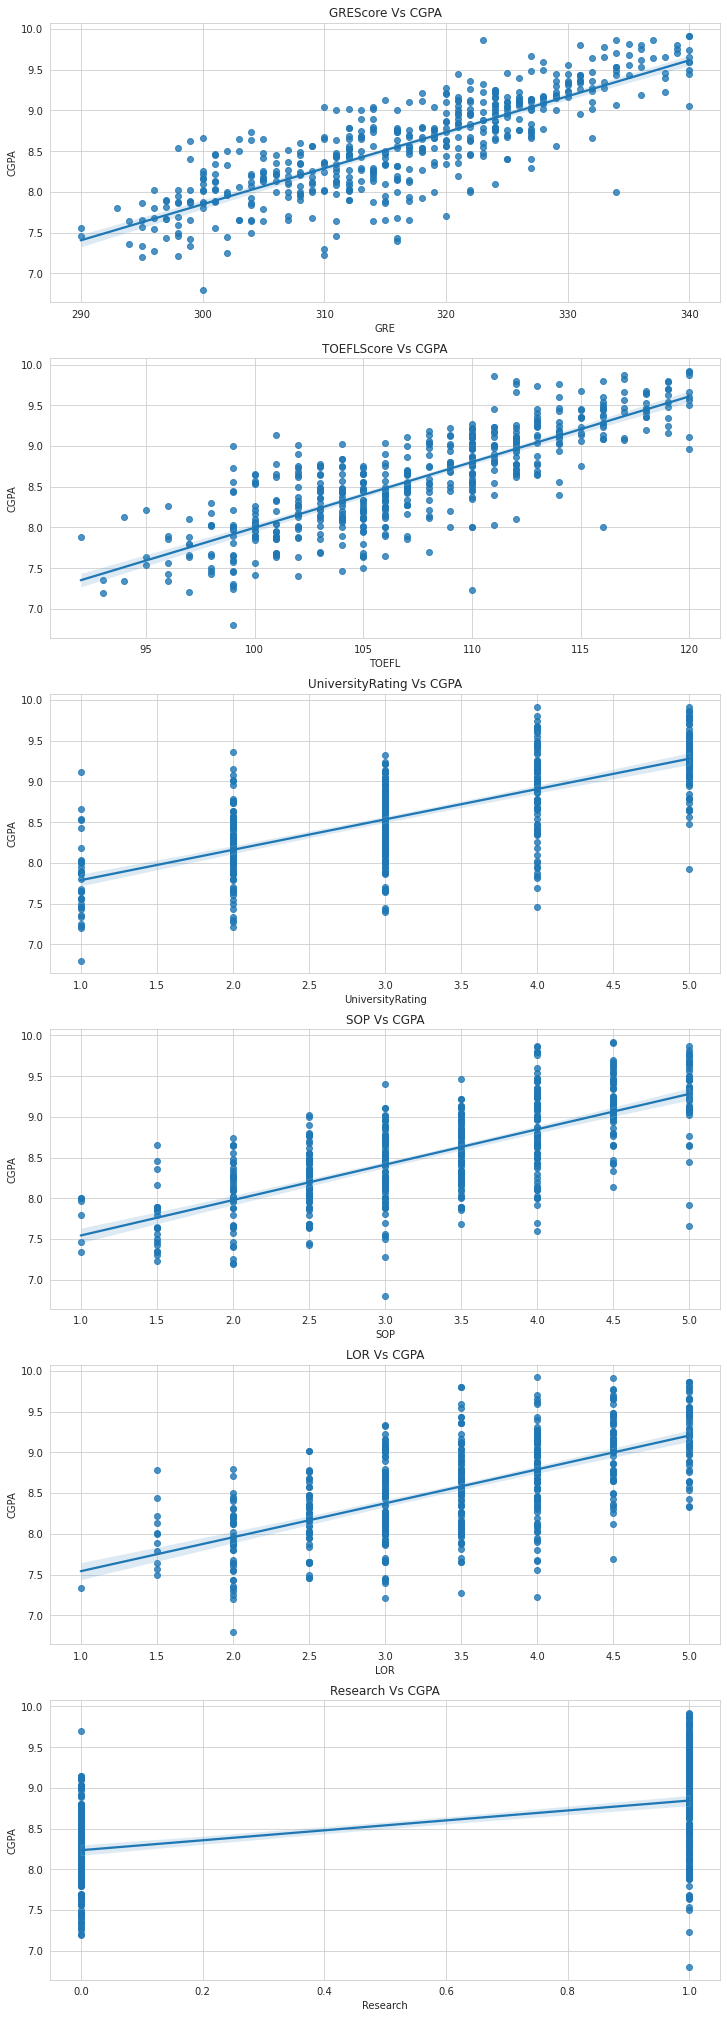

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs CGPA
ax = sns.regplot(ax=axes[0], x="GRE", y="CGPA", data=df)
ax.set_title('GREScore Vs CGPA')

# TOEFLScore Vs CGPA
ax = sns.regplot(ax=axes[1], x="TOEFL", y="CGPA", data=df)
ax.set_title('TOEFLScore Vs CGPA')

# UniversityRating Vs CGPA
ax = sns.regplot(ax=axes[2], x="UniversityRating", y="CGPA", data=df)
ax.set_title('UniversityRating Vs CGPA')

# SOP Vs CGPA
ax = sns.regplot(ax=axes[3], x="SOP", y="CGPA", data=df)
ax.set_title('SOP Vs CGPA')

# LOR Vs CGPA
ax = sns.regplot(ax=axes[4], x="LOR", y="CGPA", data=df)
ax.set_title('LOR Vs CGPA')

# Research Vs CGPA
ax = sns.regplot(ax=axes[5], x="Research", y="CGPA", data=df)
ax.set_title('Research Vs CGPA')
plt.show()

**P7 - Existe uma relação entre a Pesquisa e os outros recursos?**

Não conseguimos ver qualquer correlação entre os recursos.

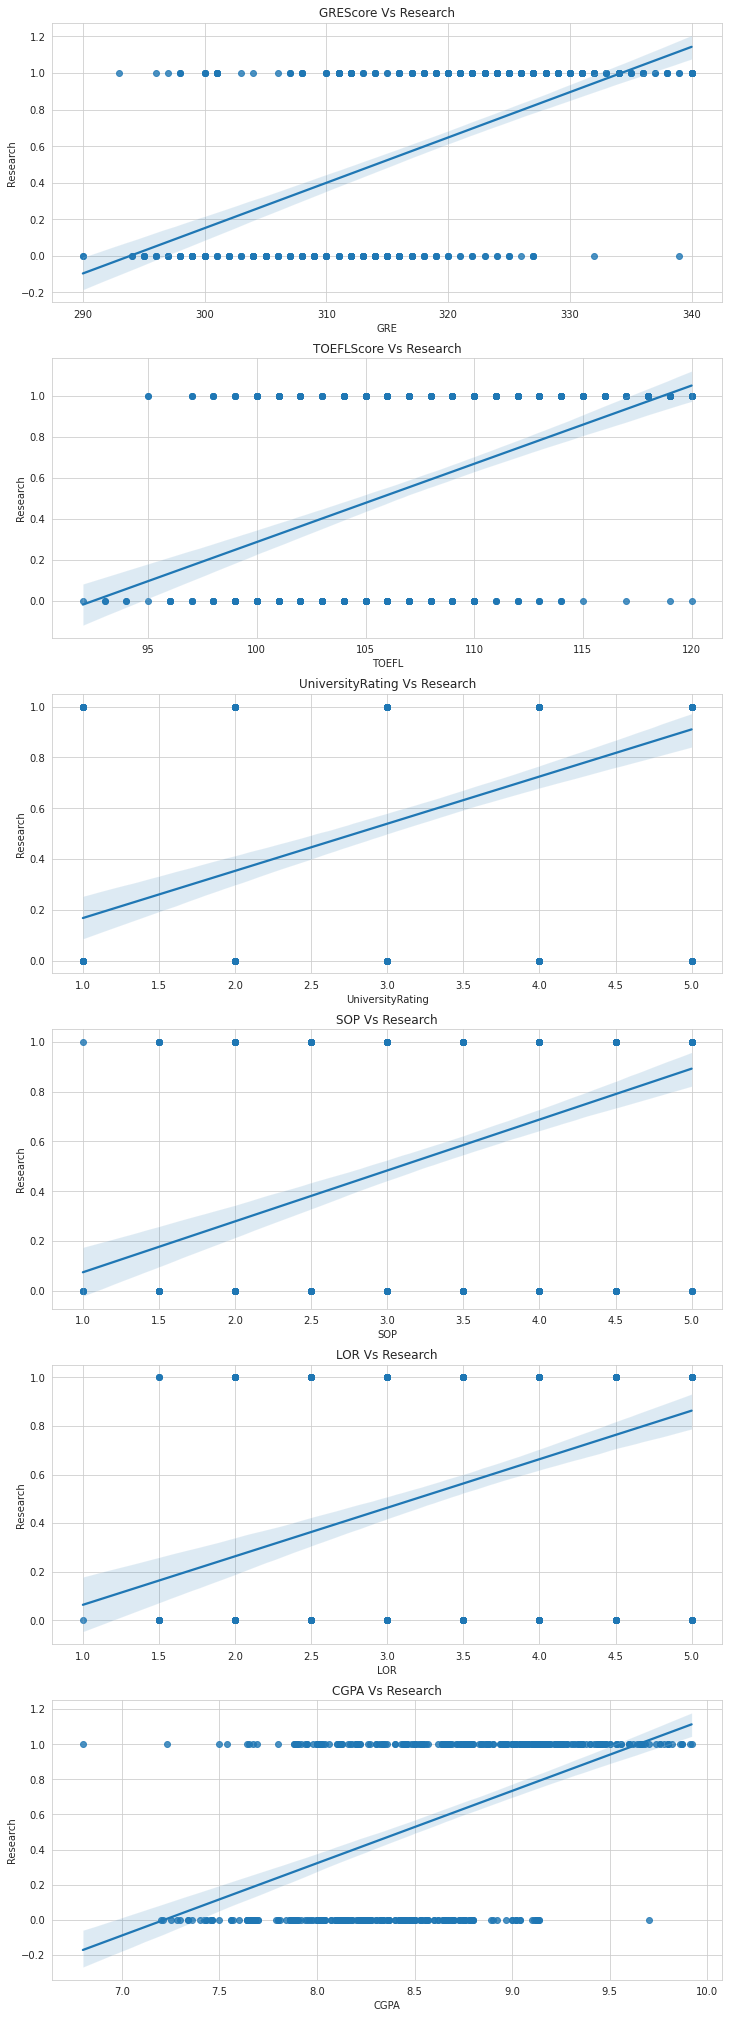

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 36))

# GREScore Vs Research
ax = sns.regplot(ax=axes[0], x="GRE", y="Research", data=df)
ax.set_title('GREScore Vs Research')

# TOEFLScore Vs Research
ax = sns.regplot(ax=axes[1], x="TOEFL", y="Research", data=df)
ax.set_title('TOEFLScore Vs Research')

# UniversityRating Vs Research
ax = sns.regplot(ax=axes[2], x="UniversityRating", y="Research", data=df)
ax.set_title('UniversityRating Vs Research')

# SOP Vs Research
ax = sns.regplot(ax=axes[3], x="SOP", y="Research", data=df)
ax.set_title('SOP Vs Research')

# LOR Vs Research
ax = sns.regplot(ax=axes[4], x="LOR", y="Research", data=df)
ax.set_title('LOR Vs Research')

# CGPA Vs Research
ax = sns.regplot(ax=axes[5], x="CGPA", y="Research", data=df)
ax.set_title('CGPA Vs Research')
plt.show()

## 11. Correlação

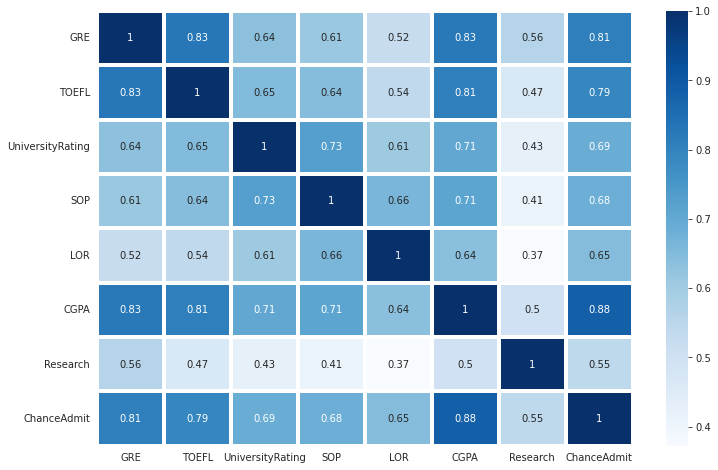

In [ ]:
# Matriz de correlação
corr_mat = df.corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_mat, annot=True, cmap="Blues", linewidth=3)
plt.show()

## 12. Dividindo os dados para treinamento e teste

Para preparar os dados para o treinamento e teste do modelo, vamos dividir os dados em conjunto de treinamento
e conjunto de teste usando a função **train_test_split**, em seguida, verificar seus tamanhos: e o mesmo valor de semente, a amostra do método seleciona o mesmo subconjunto aleatório de linhas do DataFrame. 

In [ ]:
# Definindo as features e targets
X = df.drop(["ChanceAdmit"], axis=1)
y = df["ChanceAdmit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [ ]:
X_train.shape

(375, 7)

In [ ]:
X_test.shape

(125, 7)

## 13. Treinando Modelo

A seguir, vamos treinar o modelo. Por padrão, um estimador **LinearRegression** usa todos os atributos do conjunto de dados  para realizar uma regressão linear múltipla.

Uma vantagem de trabalhar com os conjuntos de dados do scikit-learn é que eles já estão no formato para aprendizado de máquina usando modelos do scikit-learn. 
Como viu-se nos dois trechos anteriores, X_train e X_test cada um contém 7 colunas — uma por atributo. Vamos criar um estimador linear (do objeto **LinearRegression**) e ajusta-lo usando X_train e y_train:

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression()

A regressão linear múltipla produz coeficientes separados para cada atributo (armazenado em **coeff_**) no conjunto de dados e uma interceptação (armazenada em **intercept_**):

In [ ]:
feature_names = df.columns[:-1]

In [ ]:
for i, name in enumerate(feature_names):
    print(f'{name:>10}: {linear_reg.coef_[i]}')

       GRE: 0.0023905191760172145
     TOEFL: 0.0032103960880162964
UniversityRating: 0.004991661533544283
       SOP: 0.001160914513866597
       LOR: 0.01666129615553741
      CGPA: 0.11376956000393545
  Research: 0.022958342656128762


In [ ]:
linear_reg.intercept_

-1.4442951361141094

**Para coeficientes positivos**, a chance de admissão aumenta conforme o valor do recurso aumenta. **Para coeficientes negativos**, a chance de admissão diminui conforme o valor do recurso aumenta.

- Note que todos os coeficientes são positivos e relevantes, como observado na análise exploratória. O que indica que os recursos impactam positivamente para as chances de admissão.  Você pode usar esses valores com a seguinte equação para fazer previsões:

$y = m_1x_1 + m_2x_2 + … m_nx_n + b$

- $m_1, m_2, …, m_n$ são os coeficientes,
- $b$ é o viés (intercept),
- $x_1, x_2, …, x_n$ são os valores de atributos,
- $y$ é o valor predito.

## 14. Testando o Modelo

Agora, vamos testar o modelo chamando o método de previsão (**predict**) do estimador com as amostras de teste como um argumento. 

In [ ]:
predicted = linear_reg.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 0.79, expected: 0.70
predicted: 0.90, expected: 0.86
predicted: 0.78, expected: 0.74
predicted: 0.55, expected: 0.61
predicted: 0.62, expected: 0.58
predicted: 0.69, expected: 0.70
predicted: 0.96, expected: 0.94
predicted: 0.85, expected: 0.83
predicted: 0.85, expected: 0.90
predicted: 0.72, expected: 0.75
predicted: 0.69, expected: 0.65
predicted: 0.99, expected: 0.96
predicted: 0.66, expected: 0.66
predicted: 0.91, expected: 0.93
predicted: 0.73, expected: 0.72
predicted: 0.92, expected: 0.93
predicted: 0.63, expected: 0.68
predicted: 0.96, expected: 0.92
predicted: 0.55, expected: 0.50
predicted: 0.42, expected: 0.46
predicted: 0.71, expected: 0.71
predicted: 0.91, expected: 0.91
predicted: 0.65, expected: 0.66
predicted: 0.59, expected: 0.62
predicted: 0.83, expected: 0.86


## 15. Visualizando as Chances de Admissão Esperados Vs Previstos

Vejamos as chances de admissão esperados Vs previstos para os dados de teste. Primeiro, vamos
criar um DataFrame contendo colunas para os valores esperados e previstos:

In [ ]:
df_pred = pd.DataFrame()

In [ ]:
df_pred['Expected'] = pd.Series(expected)

In [ ]:
df_pred['Predicted'] = pd.Series(predicted)

**Agora** vamos plotar os dados como um gráfico de dispersão com **as chances esperados (alvo)** ao longo do eixo x
e **as chances previstos** ao longo do eixo y:

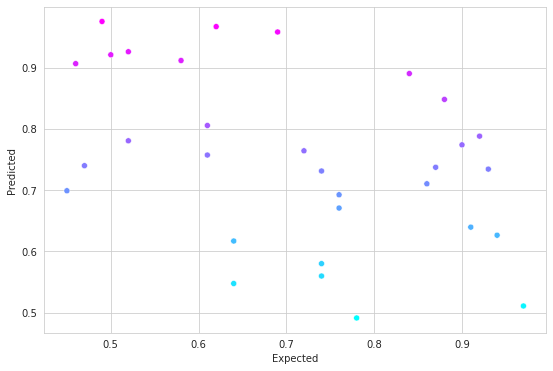

In [ ]:
figure = plt.figure(figsize=(9, 6))
axes = sns.scatterplot(data=df_pred, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

A seguir, vamos definir os limites dos eixos x e y para usar a mesma escala ao longo de ambos os eixos:

In [ ]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)

(0.38, 0.9968594294113118)


 Agora, vamos traçar uma linha que representa as previsões perfeitas (observe que isso não é a linha de regressão). 
- O snippet a seguir exibe uma linha entre os pontos que representam o canto inferior esquerdo do gráfico (início, início) e o canto superior direito do gráfico (fim, fim). 
- O terceiro argumento ('k--') indica o estilo da linha. A letra k representa a cor preta, e o - indica que o gráfico deve desenhar uma linha tracejada:

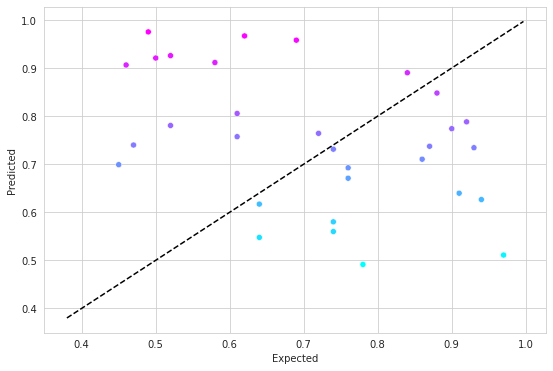

In [ ]:
figure = plt.figure(figsize=(9, 6))
axes = sns.scatterplot(data=df_pred, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
line = plt.plot([start, end], [start, end], 'k--')

## 16. Métricas do Modelo de Regressão

Scikit-learn fornece muitas funções de métricas para avaliar quão bem os estimadores prevêem os resultados e para comparar estimadores para escolher o(s) melhor(es) para o seu estudo particular.
- Essas métricas variam de acordo com o tipo de estimador. Entre as muitas métricas para estimadores de regressão está o coeficiente de determinação do modelo, que também é chamado $R^2$. Para o calculo de $R^2$ de um estimador, chame o função **r2_score** do módulo **sklearn.metrics** com os arrays que representam o esperado e resultados previstos:

O **$R^2$** varia de 0,0 a 1,0, sendo 1,0 o ajuste perfeito. 
- Uma pontuação de $R^2$ de 1,0 indica que o estimador prediz perfeitamente o valor da variável dependente, dado os valores das variáveis independentes. 
- Uma pontuação de $R^2$ de 0,0 indica que o modelo não pode fazer previsões com nenhuma precisão, com base nos valores das variáveis independentes.

Entretanto, estatisticamente, o $R^2$ não é uma métrica perfeita. Há, na verdade, uma grande falha em sua medida. Seu valor nunca diminui, não importa o número de variáveis que adicionamos ao nosso modelo de regressão. Ou seja, mesmo que estejamos adicionando variáveis redundantes aos dados, o valor de $R^2$ não diminui. Ele permanece o mesmo ou aumenta com a adição de novas variáveis independentes. Isso claramente não faz sentido, porque algumas das variáveis independentes podem não ser úteis para determinar a variável de destino. O **Adjusted $R^2$** trata desse problema.

O $R^2$ ajustado leva em consideração o número de variáveis independentes usadas para prever a variável de destino. Ao fazer isso, podemos determinar se a adição de novas variáveis ao modelo realmente aumenta o ajuste do modelo. O uso do $R^2$ ajustado é melhor quando houver várias variáveis no modelo de regressão. Isso nos permite comparar modelos com diferentes números de variáveis independentes.

Vamos dar uma olhada na equação do $R^2$ ajustado para entender melhor seu funcionamento:

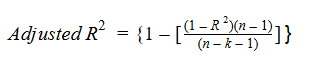

Outra métrica para modelos de regressão é o **erro absoluto médio (MAE)**, que mede o desempenho de modelos que são aplicados em variáveis contínuas, ou seja, ele calcula o erro de previsão do modelo:

    Prediction Error = Actual Value - Predicted Value

Para cada linha do conjunto de dados, devemos calcular o valor acima, então pegar o valor absoluto deles e, por fim, calcular a média de todos os erros de predição absolutos. A equação do MAE é dado por:

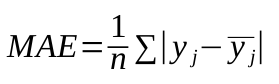

Outra métrica comum para modelos de regressão é o **erro quadrático médio (MSE)**, que calcula a diferença entre cada valor esperado e previsto. Assim, esta métrica mede quão bem as previsões realmente coincidem com os dados observados.
- Uma pontuação de MSE pequeno, indica que as respostas previstas foram muito próximas às verdadeiras.
- Uma pontuação de MSE grande, indica que para algumas observações, a previsão foi substancialmente diferente da resposta verdadeira.

Por último, a **raiz do erro quadrático médio (RMSE)** é a raiz quadrada do MSE, que mede quão longe os pontos de dados da linha de regressão estão. O RMSE é uma medida de quão espalhados são esses resíduos. Assim, ele informa o quão concentrados os dados estão em torno da linha de melhor ajuste.

Podemos dizer, então, que quando observações e previsões padronizadas são usadas como entradas do RMSE, há uma relação direta com o coeficiente de correlação. Por exemplo, se o coeficiente de correlação for 1, o RMSE será 0, porque todos os pontos estão na linha de regressão (e, portanto, não há erros).

In [ ]:
# Avaliação do modelo
r2 = metrics.r2_score(y_test, predicted)
adjusted_r2 = 1 - (1 - metrics.r2_score(y_test, predicted)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))

# Criando lista com as métricas
result = [[r2], [adjusted_r2], [mae], [mse], [rmse]]
# Criando DataFrame com as métricas
df_results = pd.DataFrame(result, columns=["Scores"], index=["R-Squared", "Adjusted R-Squared", "Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
df_results

,Scores
R-Squared,0.804378
Adjusted R-Squared,0.792674
Mean Absolute Error,0.043319
Mean Square Error,0.004025
Root Mean Square Error,0.063440


Ao analisar as métricas obtidas do nosso modelo de regressão linear múltipla. Primeiramente, notamos que o **$R^2$** e o **Ajusted $R^2$** são muito próximos e são valores altos (mais próximos de 1), o que indica que o estimador consegue predizer satisfatoriamente o valor da variável dependente, e ao mesmo passo que, os 7 recursos utilizados contribuem satisfatoriamente ao modelo.

Após, temos as métricas que determinam os erros. Nestas, notamos que as três medidas são muito pequenas. O **erro absoluto médio (MAE)** é consideravelmente baixo, indicando que o erro de previsão do estimador é baixa.

Para o **erro quadrático médio (MSE)**, temos também um valor de erro bastante pequeno, o que indica que as respostas previstas estão muito próximos às verdadeiras. Do mesmo modo, a **raiz do erro quadrático médio (RMSE)** está bem mais próximo de 0, o que indica que os pontos de dados estão mais concentrados em torno da linha de melhor ajuste. O que demonstra que, como observado na análise exploratória, os coefientes de correlação dos recursos foram próximos de 1, contribuindo para um RMSE pequeno.

## 17. Validando o Modelo

In [ ]:
def determinar_chance(prediction):
  if(prediction > 0.6 and prediction <= 0.7):
    return 'Média'
  elif(prediction > 0.7 and prediction <= 0.8):
    return 'Alta'
  elif(prediction > 0.8 and prediction <= 1):
    return 'Muita alta'
  return 'Pouca'

In [ ]:
# Novos dados de entrada
new_data = [(332, 110, 3, 4.0, 4.5, 8.6, 1)]

# Convertendo para array do numpy
new_array = np.asarray(new_data)

# Realizando a predição da entrada
prediction = linear_reg.predict(new_array)

# Exibindo o resultado
print(f'Estudante com GRE scores = {new_data[0][0]}, GPA grade = {new_data[0][1]}, Rank = {new_data[0][2]} tem chance {determinar_chance(prediction[0])}')

Estudante com GRE scores = 332, GPA grade = 110, Rank = 3 tem chance Alta


## 18. Conclusão

Nosso modelo consegue predizer as chances que um estudante possui de ser admitido em uma Universidade Internacional.